# Hierarchy Fundamentals in Atoti

In this notebook, we'll show you what you need to know to start working with hierarchies when using the Atoti Python SDK.

Before we begin, let's start off with a refresher from our Atoti Python SDK [Tutorial](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Multidimensional-concepts):

> A **cube** is a multidimensional view of some data, making it easy to explore, aggregate, filter and compare. It’s called a cube because each attribute of the data can be represented as a dimension of the cube. The axes of the cube are called **hierarchies**. The purpose of multidimensional analysis is to visualize some numeric indicators at specific coordinates of the cube. These indicators are called **measures**.

In other words, the purpose of an OLAP cube is to provide multidimensional analysis capabilities, which gives us the flexibility to slice-and-dice our data (using hierarchies) however we see fit. With this being said, let's talk about hierarchies!

💡 **Note:** Many of the initial operations in this notebook revolve around [Table Creation and Data Loads](../table-creation-and-data-loads/main.ipynb). Feel free to check out the notebook if you need some reminders on creating, loading, and joining Atoti tables.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=hierarchy-fundamentals" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try Atoti"></a></div>

## Import libraries

First things first, let's import our libraries.

In [1]:
import atoti as tt
import pandas

## Instantiate Atoti server and link UI

Next, we'll spin up the Atoti server and link the [session](https://docs.atoti.io/latest/api/atoti.Session.html#atoti.Session) to our web-based Atoti UI.

In [2]:
session = tt.Session.start(
    tt.SessionConfig(
        user_content_storage="./01-content",
        port=9124,
        java_options=["-Xms1G", "-Xmx10G"],
    )
)
session.link

http://localhost:9124

## Load CSVs from S3 into Atoti tables

From here on, we'll load the following CSVs from S3 into Atoti tables.

* [Orders](#Orders)
* [Products](#Products)
* [Shippers](#Shippers)
* [Customers](#Customers)
* [Employees](#Employees)

💡 **Note**: Sometimes we want numerical columns to be used as hierarchies instead of measures (e.g. an Order ID should be used as a hierarchy rather than a measure, and does not need to be aggregated). For this reason, we can explicitly set specific Atoti table columns as desired data types (in this case strings) when loading data into Atoti tables.

See https://docs.atoti.io/latest/api/atoti.Session.read_csv.html#atoti.Session.read_csv for more info.

### Orders

In [3]:
orders = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Orders.csv",
    table_name="Orders",
    data_types={
        "OrderId": tt.STRING,
        "OrderDate": tt.LOCAL_DATE,
        "ProductId": tt.STRING,
        "EmployeeId": tt.STRING,
        "CustomerId": tt.STRING,
    },
    date_patterns={"OrderDate": "dd/M/yyyy"},
    keys=["OrderId"],
)
orders.head()

,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId,InventoryId
OrderId,,,,,,,,
13,2024-02-18,233,32.01,Federal Shipping,1358,18551,c4859,388
27,2024-02-18,749,21.96,Rapid Post,1514,26584,c4747,374
41,2024-02-18,454,11.73,Freight United,773,98635,c2675,360
55,2024-02-18,2,32.18,Speedy Express,1137,18336,c1275,346
69,2024-02-18,672,56.04,Speedy Express,591,26584,c3067,332


### Products

In [4]:
products = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Products.csv",
    table_name="Products",
    data_types={
        "ProductId": tt.STRING,
        "ProductName": tt.STRING,
        "ProductCategory": tt.STRING,
        "Supplier": tt.STRING,
        "PurchasingPricePerUnit": tt.DOUBLE,
    },
    keys=["ProductId"],
)
products.head()

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,
695,Gorgonzola Telino,Dairy Products,Formaggi Fortini s.r.l.,7.2
877,Mascarpone Fabioli,Dairy Products,Formaggi Fortini s.r.l.,18.43
1059,Ipoh Coffee,Beverages,Leka Trading,31.05
1241,Spegesild,Seafood,Lyngbysild,6.48
1423,Gumbär Gummibärchen,Confections,Heli Süßwaren GmbH & Co. KG,16.81


### Shippers

In [5]:
shippers = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Shippers.csv",
    table_name="Shippers",
    data_types={
        "ShipperName": tt.STRING,
        "Contact": tt.STRING,
    },
)
shippers.head()

,ShipperName,Contact
0,Freight United,Geoff Matthews
1,Federal Shipping,Liz Welds
2,Rapid Post,Payal Shah
3,The Transporter,Funmi Odunga
4,United Package,Junqi Huang


### Customers

In [6]:
customers = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Customers.csv",
    table_name="Customers",
    data_types={
        "CustomerId": tt.STRING,
        "CompanyName": tt.STRING,
        "Region": tt.STRING,
        "Country": tt.STRING,
        "Address": tt.STRING,
        "City": tt.STRING,
        "PostCode": tt.STRING,
        "Phone": tt.STRING,
    },
    keys=["CustomerId"],
)
customers.head()

,CompanyName,Address,City,PostalCode,Region,Country,Subregion,Phone,PostCode
CustomerId,,,,,,,,,
c3571,Bon app',"12, rue des Bouchers",Marseille,13008,Europe,France,Western Europe,91.24.45.40,N/A
c4075,Drachenblut Delikatessen,Walserweg 21,Aachen,52066,Europe,Germany,Western Europe,0241-039123,N/A
c4243,Galería del gastrónomo,"Rambla de Cataluña, 23",Barcelona,8022,Europe,Spain,Southern Europe,(93) 203 4560,N/A
c5083,Laughing Bacchus Wine Cellars,1900 Oak St.,Vancouver,V3F 2K1,Northern America,Canada,North America,(604) 555-3392,N/A
c5027,Lazy K Kountry Store,12 Orchestra Terrace,Walla Walla,99362,Northern America,United States,North America,(509) 555-7969,N/A


### Employees

In [7]:
employees = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Employees.csv",
    table_name="Employees",
    data_types={
        "EmployeeId": tt.STRING,
        "EmployeeName": tt.STRING,
        "EmployeeCountry": tt.STRING,
        "EmployeeCity": tt.STRING,
    },
    keys=["EmployeeId"],
)
employees.head()

,EmployeeName,EmployeeZone,EmployeeCountry,EmployeeCity
EmployeeId,,,,
63528,Sean Tan,ASIA,SG,Singapore
98635,Shannon Lim,ASIA,SG,Singapore
12344,Paul Henry,EMEA,FR,Paris
12695,Louis Philippe,EMEA,FR,Lyon
18336,Steven Buchanan,EMEA,UK,London


## Join tables and create cube

Now that our data is loaded into Atoti tables and in the format that we want, we can join our tables together on their common keys and create our Atoti cube.

In [8]:
# Join tables
orders.join(products, orders["ProductId"] == products["ProductId"])
orders.join(employees, orders["EmployeeId"] == employees["EmployeeId"])
orders.join(customers, orders["CustomerId"] == customers["CustomerId"])
orders.join(shippers, orders["ShipperName"] == shippers["ShipperName"])

In [9]:
# Create Cube from Atoti Table object
cube = session.create_cube(orders)

## Analyze the Atoti cube

Now that the data has been loaded into the cube, we'll want to examine the data model of the cube to confirm that the columns and data types match up to what we expect. In addition, we can alias the hierarchies, levels, and measures as new variables for enhanced readability when manipulating these components of the cube.

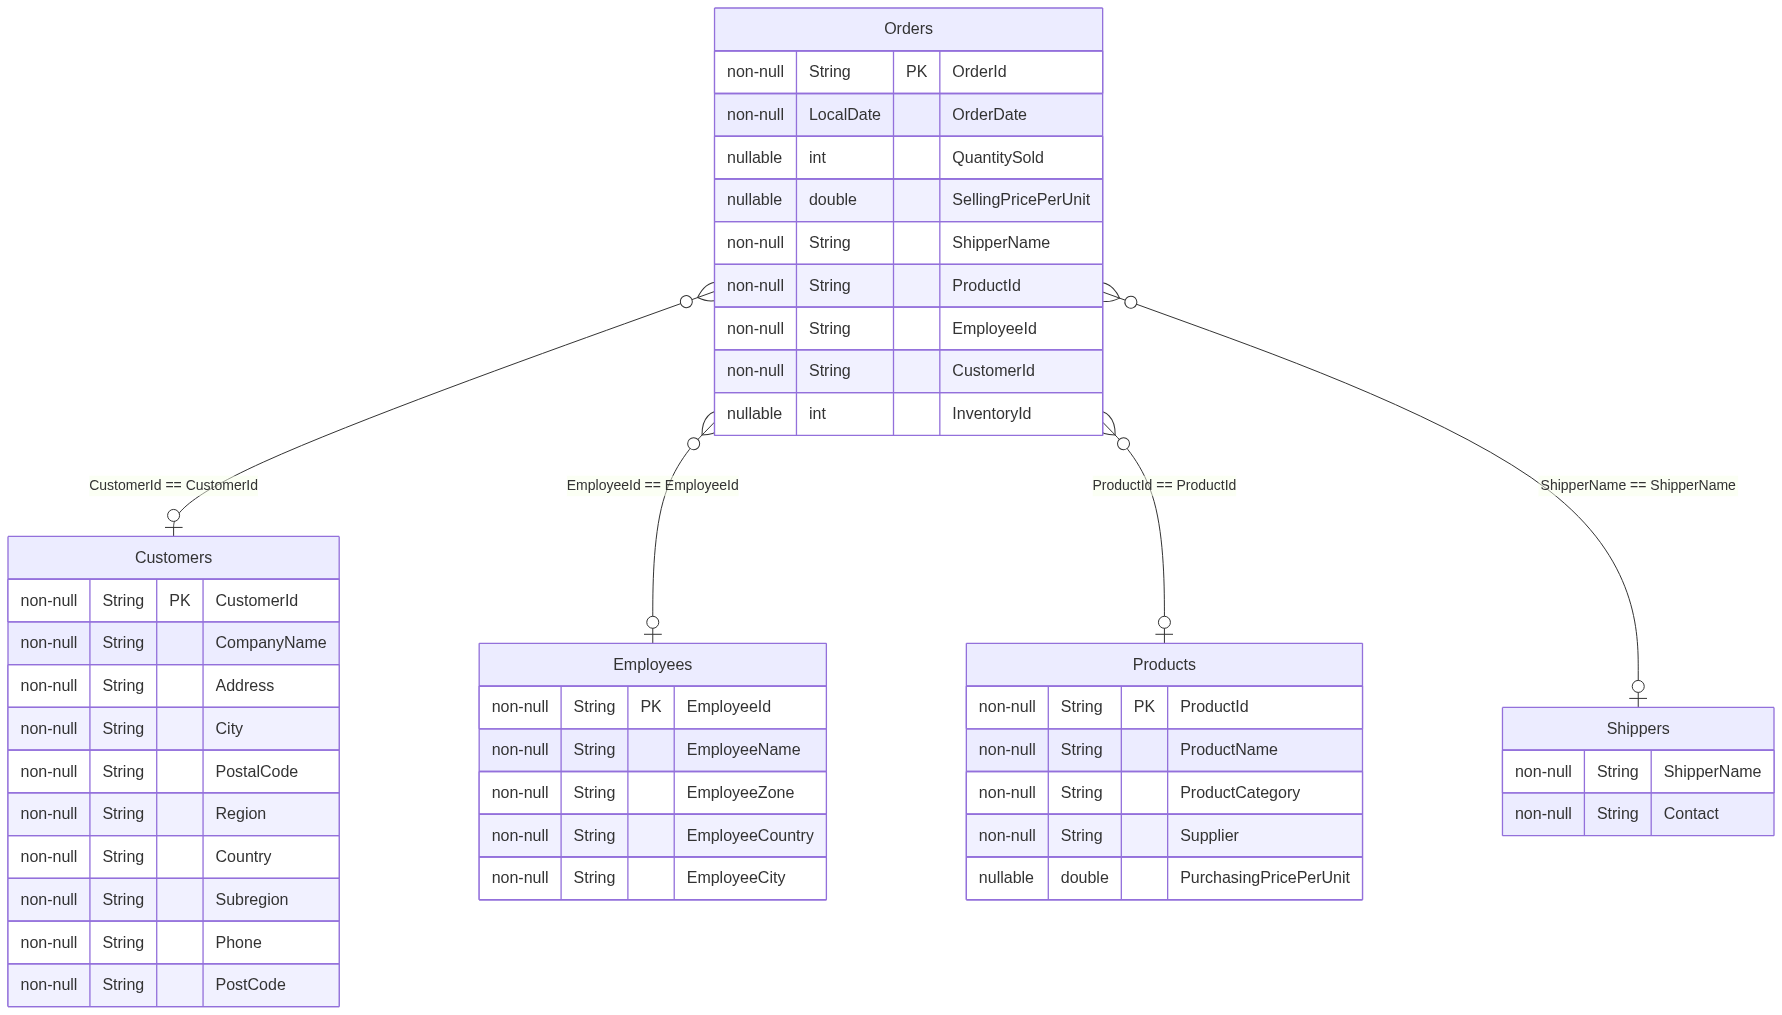

In [10]:
# View the schema of the data model
session.tables.schema

In [11]:
# Set aliases for hierarchies, levels, and measures
h, l, m = cube.hierarchies, cube.levels, cube.measures

## Viewing hierarchies

Because this walk through is about hierarchies, we'll focus on our new alias representing the list of hierarchies for the cube, categorized by dimensions and the associated levels for each hierarchy (starting with a 0-based index).

💡 **Note**: Hierarchies can have [multiple levels](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Multilevel-hierarchies), which we will show [later in this notebook](#Using-Multi-Level-Hierarchies).

In [12]:
h

{('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x12623d210>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x12620fe10>, ('Orders', 'CustomerId'): <atoti.hierarchy.Hierarchy object at 0x1261dd410>, ('Orders', 'ProductId'): <atoti.hierarchy.Hierarchy object at 0x1261fa610>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x1261fb2d0>, ('Orders', 'EmployeeId'): <atoti.hierarchy.Hierarchy object at 0x1261f9f50>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x1261f95d0>, ('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x1261fa950>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x1261fb850>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x1261f94d0>, ('Customers', 'PostCode'): <atoti.hierarchy.Hierarchy object at 0x1261f9750>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x1261fa110>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x1261f9a90>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x1261f9b90>, ('Customers', 'Subregion'): <atoti.hierarchy.Hierarchy object at 0x1261fa150>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x1261f9890>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x1261f9c10>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x1261f9c50>, ('Shippers', 'Contact'): <atoti.hierarchy.Hierarchy object at 0x1261f9e90>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x126228d90>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x12622a750>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x12622a790>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x1261e7b50>}

## Hierarchy basics

Now that we have our cube up and running and have checked the hierarchies present in the cube, let's use `session.widget` to open up an Atoti JupyterLab extension connected to our cube, and investigate the quantity sold per product.

Here we can use the `ProductId` hierarchy and the `QuantitySold.SUM` measure to perform this operation in Atoti.

💡 **Note**: We can also use `session.link` to perform the same investigation within the Atoti UI; however, for the purposes of this walk through, we've elected to use `session.widget` so that we can show our analysis directly within this Jupyter notebook and provide storytelling as we create several visualizations in Atoti in a sequential manner.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
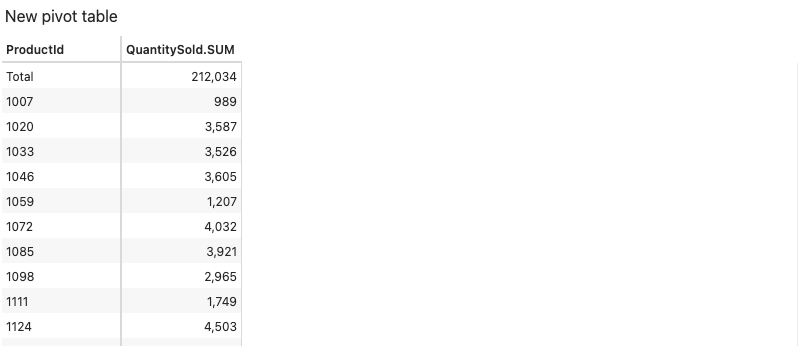

In [13]:
session.widget

But perhaps we also want to know the particular customers that bought each product, along with the quantity sold per product and customer. With Atoti, this is as simple as adding another hierarchy, `CustomerId`, to our analysis to further slice-and-dice our data. As we can see, the total for the `QuantitySold.SUM` measure stays the same at `212,034`, but we can drill down to see a more granular breakdown.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
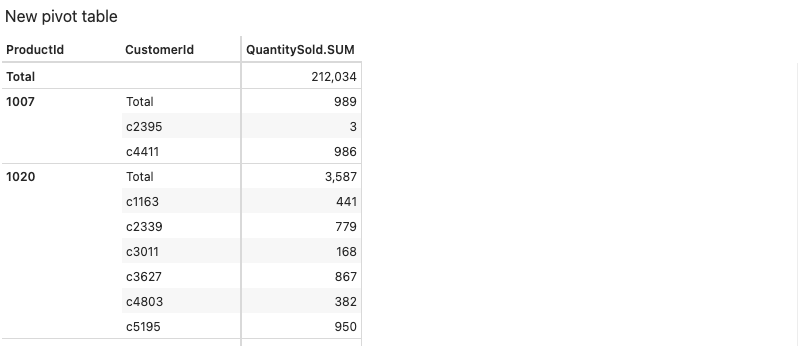

In [14]:
session.widget

## Using multi-level hierarchies

Previously, we mentioned single-level hierarchies and multi-level hierarchies. Single-level hierarchies are created by default (specifically if we [create our cube](https://docs.atoti.io/latest/api/atoti.Session.create_cube.html#atoti-session-create-cube) in **auto** or **no_measures** mode), and usually map one-to-one to the columns of an Atoti table; however, if a parent-child relationship exists, we may want to logically group associated levels together to reflect such a relationship. This is the basis for multi-level hierarchies.

For example, there is a parent-child relationship between our `ProductCategory` (parent) and `ProductId` (child) single-level hierarchies, as each individual product falls within the umbrella of a higher-level product category. If we create a multi-level Product hierarchy, like so:

In [15]:
h["Product"] = [l["ProductCategory"], l["ProductId"]]

As a best practice, we should also clean up the associated single-level hierarchies to avoid redundancy.

In [16]:
# # We've commented this cell to avoid disrupting the
# # upstream widgets that depend on these hierarchies.
# # Uncomment this cell and execute to delete the hierarchies.
# del h['ProductCategory']
# del h['ProductId']

What we’ll now see either in the Atoti UI or Atoti JupyterLab extension, is a hierarchy with a drop-down illustrating this parent-child relationship.

![multi-level-hierarchies](https://data.atoti.io/notebooks/hierarchies/images/multi-level-hierarchies.png)


And if we now use the `Product` hierarchy in our analysis, we get a breakdown of our data for `QuantitySold.SUM` by associated product categories and product IDs.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
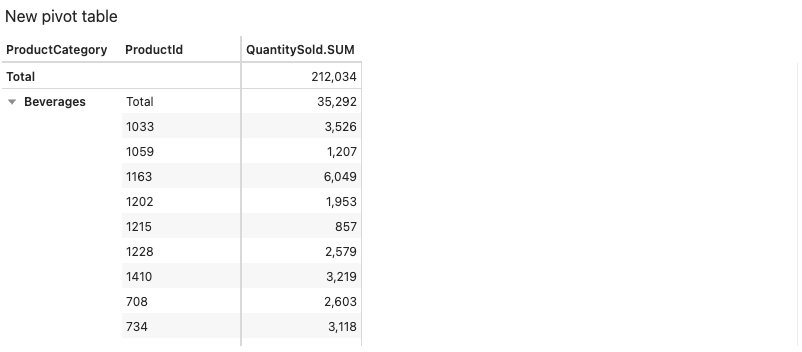

In [17]:
session.widget

## Multi-level date hierarchies

One of the most common use cases for creating multi-level hierarchies is when dealing with dates. For example, perhaps we want to have a multi-level `OrderDate` hierarchy that shows the breakdown for each corresponding year, quarter, month, day, and so on.

As of right now, our single-level `OrderDate` hierarchy can only drill-down to the fully qualified date as shown. 

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
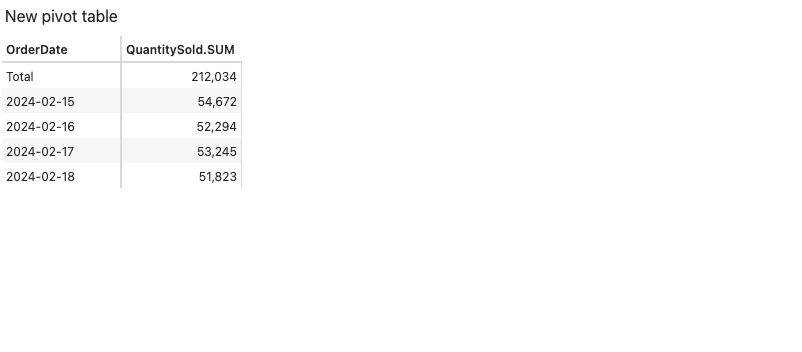

In [18]:
session.widget

But if we create a multi-level `OrderDate` hierarchy, we can then show the breakdown for each corresponding year, quarter, month, and day.

💡 **Note**: https://docs.atoti.io/latest/api/atoti.Cube.create_date_hierarchy.html#atoti.Cube.create_date_hierarchy

In [19]:
# Create a multi-level date hierarchy
cube.create_date_hierarchy(
    "Multi-level Date",
    column=orders["OrderDate"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [20]:
# # We've commented this cell to avoid disrupting the
# # upstream widgets that depend on these hierarchies.
# # Uncomment this cell and execute to delete the hierarchies.
# del h['OrderDate']

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
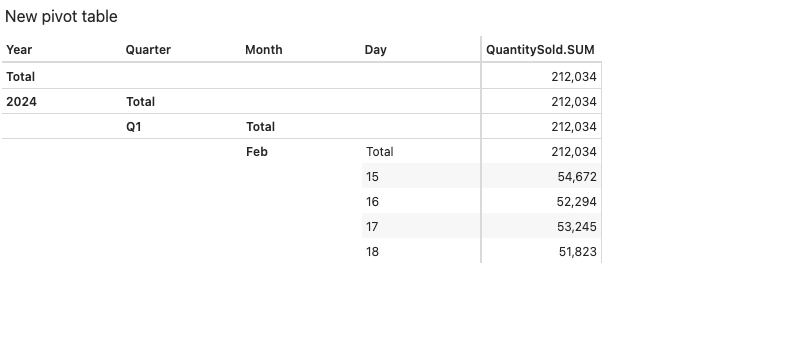

In [21]:
session.widget

And that's it for now! 🎉

We hope that this walk through gives you a jump start for working with hierarchies in Atoti 😊. Stay tuned for more advanced topics on Atoti hierarchies in the future! Until then, take care! 👋

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=hierarchy-fundamentals" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try Atoti"></a></div>